# step 3 vizualization

In [45]:
import pandas as pd
import numpy as np
import math
import re
import matplotlib.pyplot as plt
import seaborn as sns

from wordcloud import WordCloud

from os import path
from PIL import Image

In [38]:
df=pd.read_csv("final_df_with_fabric_vectors.csv")

Text(0.5, 0, 'Group Numbers (0-5)')

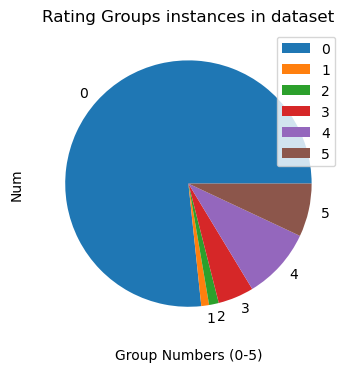

In [24]:
Rating_groups_df = pd.DataFrame(index=[0,1,2,3,4,5], columns=["Num"])
for i in range(0,6):
    Rating_groups_df["Num"][i] = 0
    
for ind in df.index:
    Rating_groups_df["Num"][df["ratings"][ind]] = Rating_groups_df["Num"][df["ratings"][ind]] + 1
    
Rating_groups_df
fig, ax = plt.subplots(figsize=(5,4))
ax = Rating_groups_df.plot(kind='pie',y="Num",ax=ax)
ax.set_title("Rating Groups instances in dataset")
ax.set_xlabel("Group Numbers (0-5)")

הסבר על התרשים\מסקנות:
ניתן לראות מההתפלגות שרוב הפריטים אינם מדורגים, דבר אשר ציפינו לו כיוון שבאתרים קטנים ללא דחיפה או עזרה חיצונית בדירוג שיקרי של הפריטים, אנשים יכולים לדרג רק פריטים אשר הם קנו בעצמם והקונים מדרגים רק על סמך חוויה אישית ולא בניסיון להרוויח נקודות הדוחפות לדירוג מסיבי.
בנוסף באתרים קטנים יותר וביחוד בוטיקים מהסוג בו בחרנו, קיימת התחדשות מהירה של הוספת פריטים חדשים והורדת הישנים כך שהפריטים הישנים בעלי הדירוג הגבוהה יורדים מהר יותר והחדשים שעוד לא הספיקו לקבל דירוג תופסים מקום משמעותי יותר.

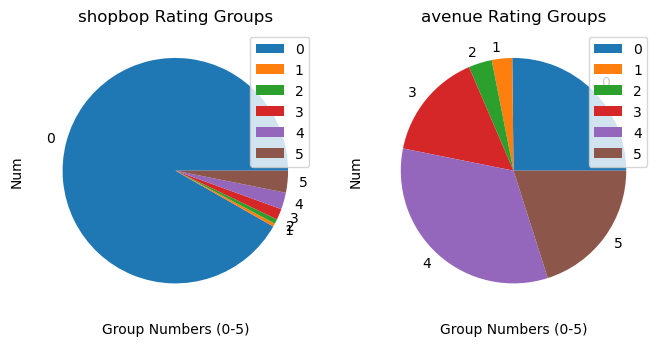

In [25]:
Rating_groups_dfS = pd.DataFrame(index=[0,1,2,3,4,5], columns=["Num"])
Rating_groups_dfV = pd.DataFrame(index=[0,1,2,3,4,5], columns=["Num"])
for i in range(0,6):
    Rating_groups_dfS["Num"][i] = 0
    Rating_groups_dfV["Num"][i] = 0
    
for ind in df.index:
    if df["brand"][ind]=="shopbop":
        Rating_groups_dfS["Num"][df["ratings"][ind]] = Rating_groups_dfS["Num"][df["ratings"][ind]] + 1
    else:
        Rating_groups_dfV["Num"][df["ratings"][ind]] = Rating_groups_dfV["Num"][df["ratings"][ind]] + 1
    
fig = plt.figure(figsize=(8,5))

ax1=fig.add_subplot(1,2,1)
ax1 = Rating_groups_dfS.plot(kind='pie',y="Num",ax=ax1)
ax1.set_title("shopbop Rating Groups")
ax1.set_xlabel("Group Numbers (0-5)")

ax2=fig.add_subplot(1,2,2)
ax2 = Rating_groups_dfV.plot(kind='pie',y="Num",ax=ax2)
ax2.set_title("avenue Rating Groups")
ax2.set_xlabel("Group Numbers (0-5)")


plt.show()

In [30]:
normalized_categorys=[]

for row in df.category:
    if row=='Dresses': normalized_categorys.append(1)
    if row=='Jackets_Coats': normalized_categorys.append(2)    
    if row=='Jumpsuits_Rompers': normalized_categorys.append(3)
    if row=='Lingerie': normalized_categorys.append(4)    
    if row=='Maternity': normalized_categorys.append(5)    
    if row=='Pants': normalized_categorys.append(6)    
    if row=='Skirts': normalized_categorys.append(7)  
    if row=='Sleepwear': normalized_categorys.append(8)   
    if row=='Sweaters_Knits': normalized_categorys.append(9)    
    if row=='Swimsuits_Cover_Ups': normalized_categorys.append(10)    
    if row=='Tops': normalized_categorys.append(11)
        
len(normalized_categorys)


11449

In [31]:
category_dict={1:'Dresses', 2:'Jackets_Coats', 3:'Jumpsuits_Rompers', 4:'Lingerie', 5:'Maternity', 6:'Pants',
              7:'Skirts', 8:'Sleepwear', 9:'Sweaters_Knits', 10:'Swimsuits_Cover_Ups', 11:'Tops'}
df["category"]=normalized_categorys

Text(0.5, 0, 'Group Numbers (1-12)')

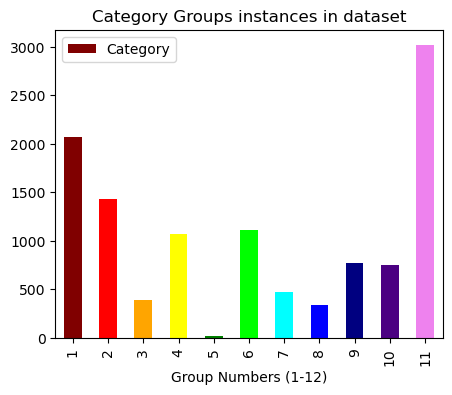

In [32]:
Category_groups_df = pd.DataFrame(index=[1,2,3,4,5,6,7,8,9,10,11], columns=["Category"])
for i in range(1,12):
    Category_groups_df["Category"][i] = 0
    
for ind in df.index:
    Category_groups_df["Category"][normalized_categorys[ind]] = Category_groups_df["Category"][normalized_categorys[ind]] + 1
    
color_map=['maroon','red','orange','yellow', 'green','lime','aqua', 'blue','navy', 'indigo', 'violet']
    
fig, ax = plt.subplots(figsize=(5,4))
ax = Category_groups_df.plot(kind='bar',y="Category",ax=ax, color=color_map)
ax.set_title("Category Groups instances in dataset")
ax.set_xlabel("Group Numbers (1-12)")

In [33]:
index = list(category_dict.keys())
val = list(category_dict.values())

category_indx=pd.DataFrame({"index":index,"category":val})
category_indx

,index,category
0,1,Dresses
1,2,Jackets_Coats
2,3,Jumpsuits_Rompers
3,4,Lingerie
4,5,Maternity
5,6,Pants
6,7,Skirts
7,8,Sleepwear
8,9,Sweaters_Knits
9,10,Swimsuits_Cover_Ups


<AxesSubplot:xlabel='ratings'>

<Figure size 1000x2000 with 0 Axes>

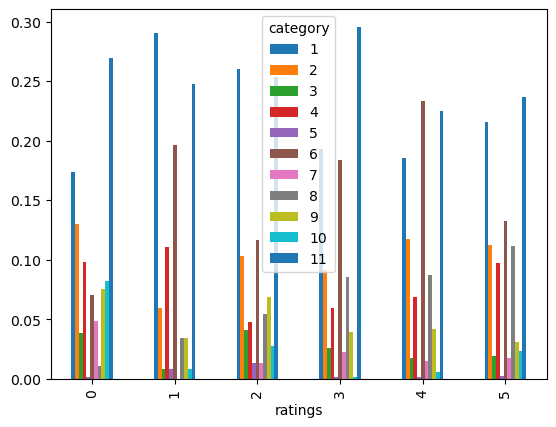

In [34]:
fig = plt.figure(figsize=(10,20))

ct1=pd.crosstab(df['ratings'], df['category'], normalize="index")
ct1.plot(kind='bar')


<AxesSubplot:>

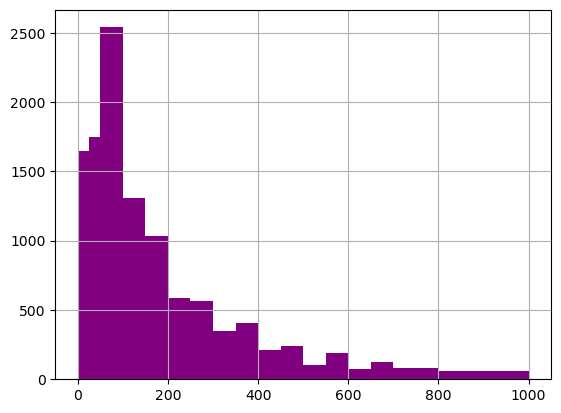

In [35]:
df.prices.hist(bins=[0, 25, 50, 100,150, 200,250, 300, 350, 400,450, 500,550, 600,650,700,800,900,1000], color='purple')

Text(0.5, 1.0, 'price by clothing rating')

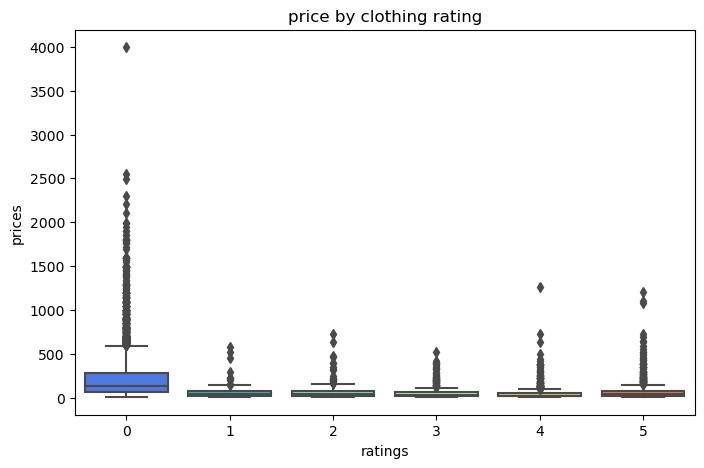

In [36]:
plt.figure(figsize=(8,5))
sns.boxplot(x='ratings',y='prices',data=df, palette='rainbow')
plt.title("price by clothing rating")

Text(0.5, 1.0, 'Violin Plot of price by clothing rating')

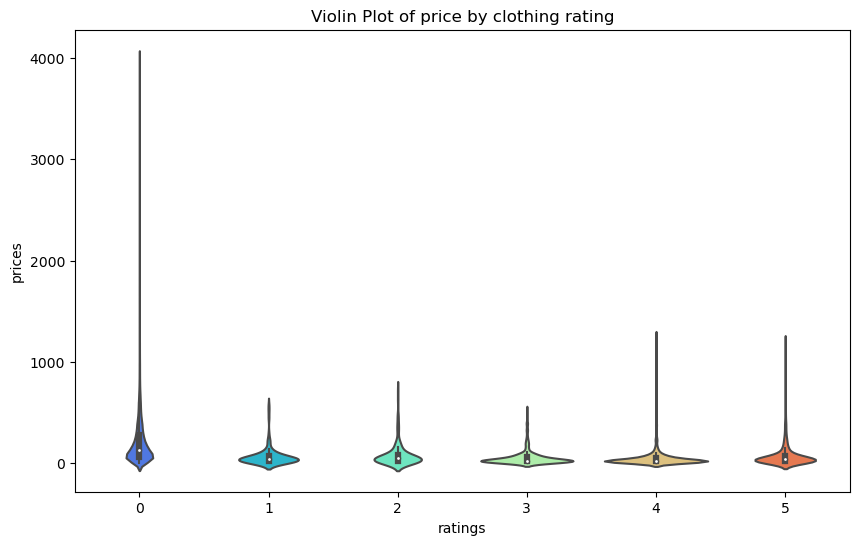

In [37]:
plt.figure(figsize=(10,6))
sns.violinplot(x='ratings',y='prices',data=df, palette='rainbow')
plt.title("Violin Plot of price by clothing rating")

In [39]:
sizes_groups_df = pd.DataFrame(index=[0,1,2,3,4,5,6,7,8,9,10,11,12], columns=["Num"])
for i in range(0,13):
    sizes_groups_df["Num"][i] = 0 

size_names=["XXS","XS","S","P","M","L","XL","XXL","XXXL","XXXXL","One_size","5XL","6XL"]      

    
for ind in df.index:
    for i,name in  enumerate(size_names):
        if(df[name][ind]==1):
            sizes_groups_df["Num"][i] = sizes_groups_df["Num"][i] + 1

sizes_groups_df            

,Num
0,0
1,2173
2,8667
3,154
4,8095
5,9137
6,2496
7,2493
8,1495
9,1438


Text(0.5, 1.0, 'Rating corr to sizes')

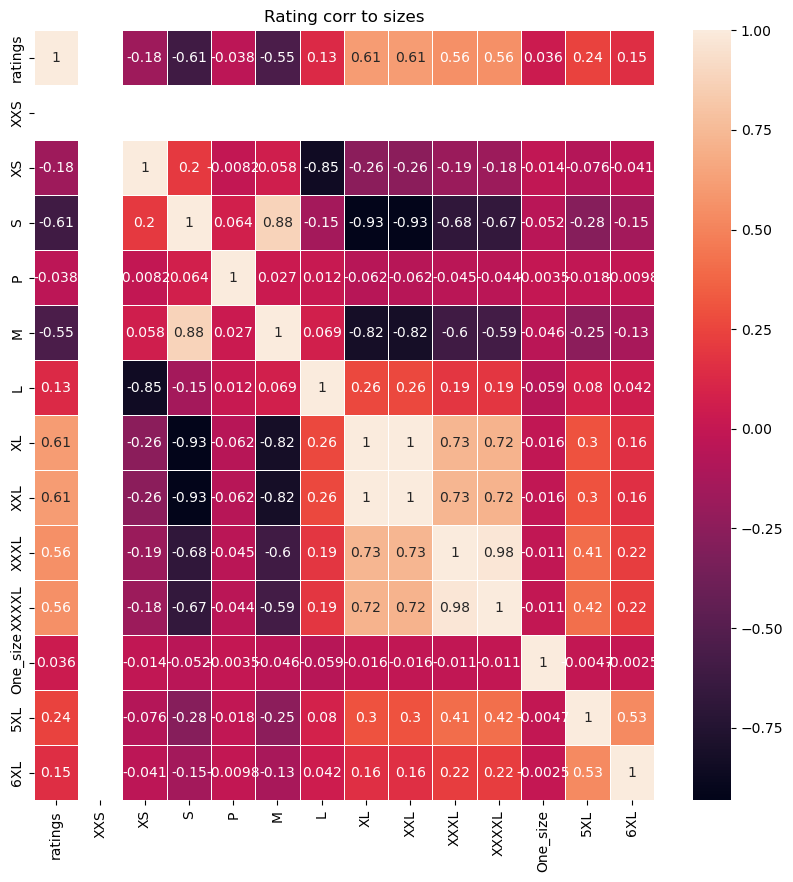

In [40]:
dataset_df1 = pd.DataFrame(df, columns =['ratings',"XXS","XS","S","P","M","L","XL","XXL","XXXL","XXXXL","One_size","5XL","6XL"])
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(dataset_df1.corr(), annot=True, linewidths=.5, ax=ax)
ax.set_title("Rating corr to sizes")

Text(0.5, 1.0, 'Rating corr to colors')

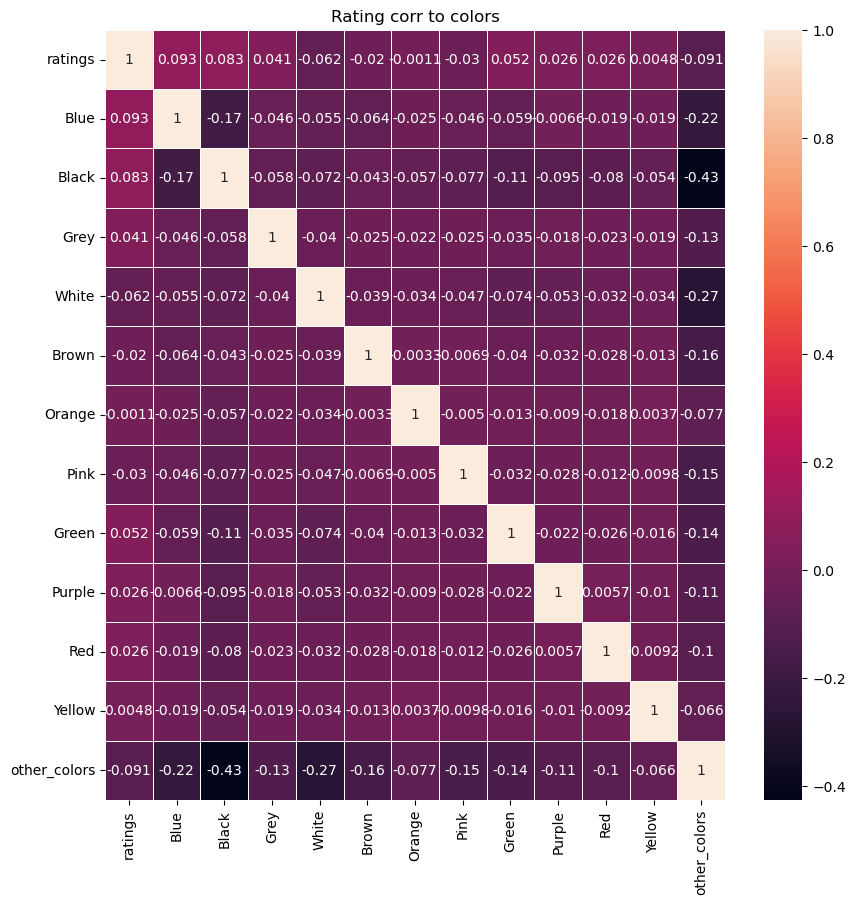

In [41]:
dataset_df1 = pd.DataFrame(df, columns =['ratings',"Blue",'Black',"Grey",'White','Brown','Orange','Pink','Green','Purple','Red','Yellow','other_colors'])
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(dataset_df1.corr(), annot=True, linewidths=.5, ax=ax)
ax.set_title("Rating corr to colors")

Text(0.5, 1.0, 'Rating corr to fabric')

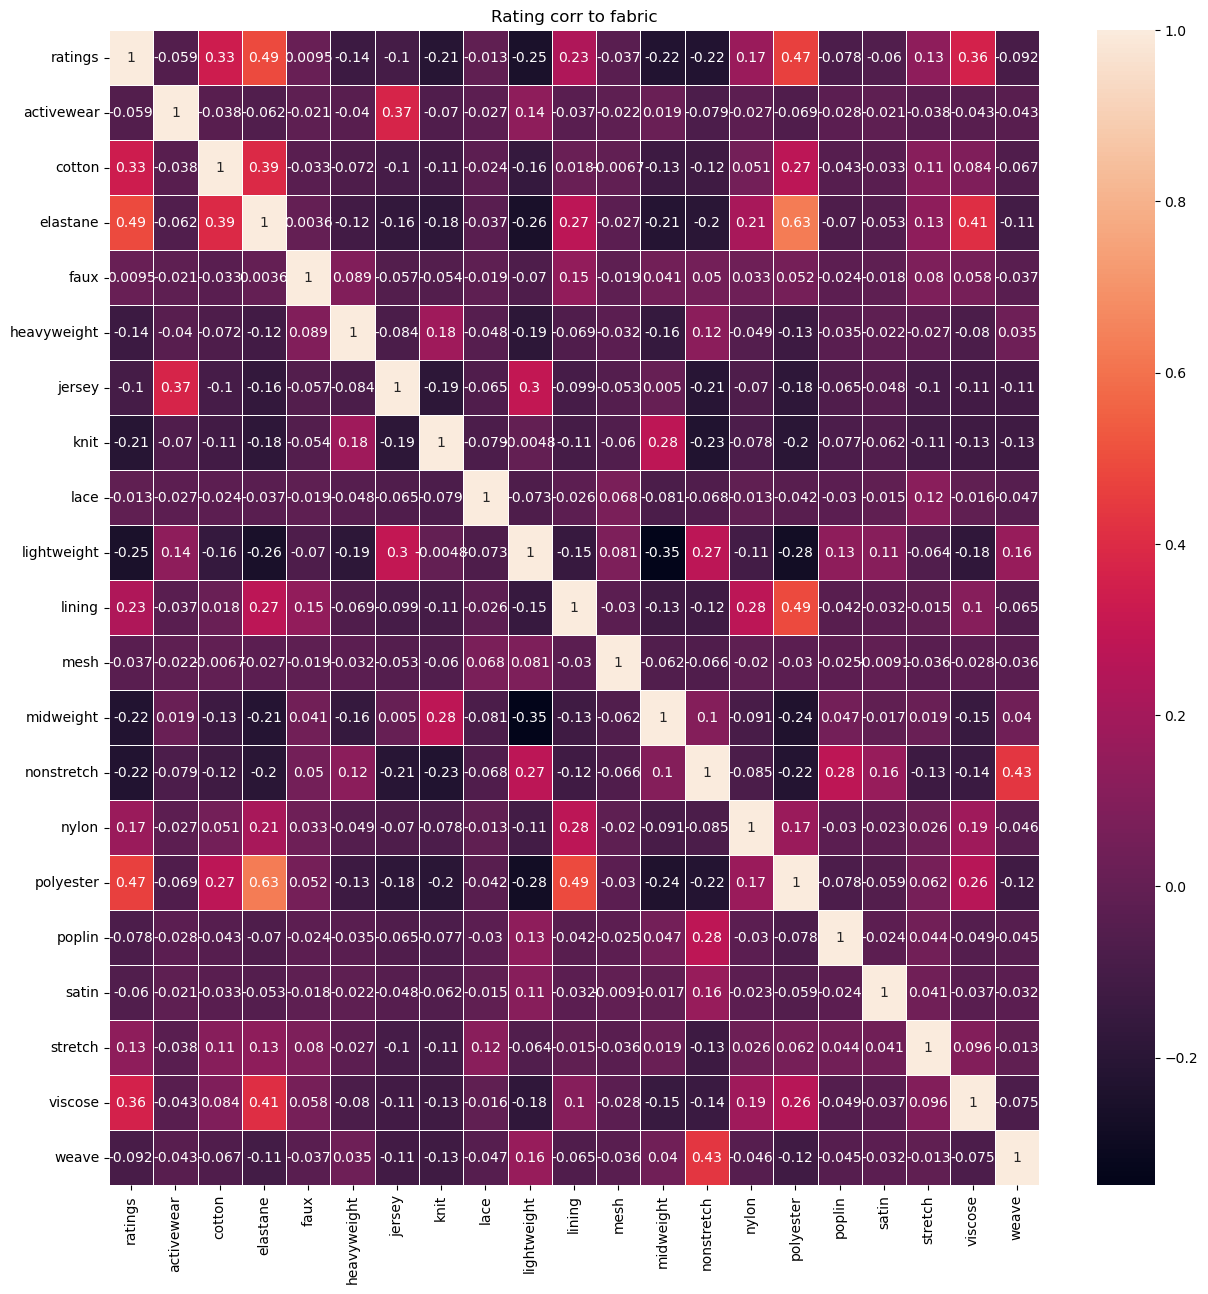

In [42]:
dataset_df1 = pd.DataFrame(df, columns =['ratings','activewear','cotton','elastane','faux','heavyweight','jersey','knit',
 'lace','lightweight','lining','mesh','midweight','nonstretch','nylon','polyester','poplin','satin','stretch','viscose','weave'])
fig, ax = plt.subplots(figsize=(15,15))
sns.heatmap(dataset_df1.corr(), annot=True, linewidths=.5, ax=ax)
ax.set_title("Rating corr to fabric")

In [43]:
data = df['fabrics'].value_counts().to_dict()

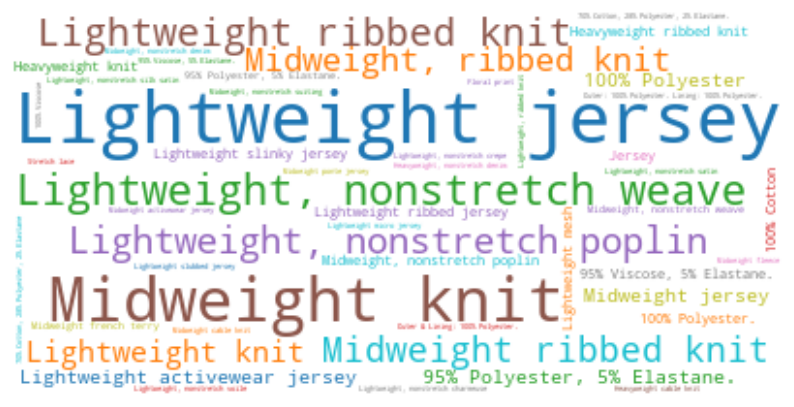

In [67]:
wordcloud = WordCloud(max_font_size=50, max_words=75, background_color="white", colormap="tab10").generate_from_frequencies(data)
plt.figure(figsize=(10,10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [46]:
shirt_mask = np.array(Image.open("shirt_final_mask.png"))
shirt_mask

array([[[ 31,  31,  31, 255],
        [ 31,  31,  31, 255],
        [ 31,  31,  31, 255],
        ...,
        [ 31,  31,  31, 255],
        [ 31,  31,  31, 255],
        [ 31,  31,  31, 255]],

       [[ 31,  31,  31, 255],
        [ 31,  31,  31, 255],
        [ 31,  31,  31, 255],
        ...,
        [ 31,  31,  31, 255],
        [ 31,  31,  31, 255],
        [ 31,  31,  31, 255]],

       [[ 31,  31,  31, 255],
        [ 31,  31,  31, 255],
        [ 31,  31,  31, 255],
        ...,
        [ 31,  31,  31, 255],
        [ 31,  31,  31, 255],
        [ 31,  31,  31, 255]],

       ...,

       [[ 31,  31,  31, 255],
        [ 31,  31,  31, 255],
        [ 31,  31,  31, 255],
        ...,
        [ 31,  31,  31, 255],
        [ 31,  31,  31, 255],
        [ 31,  31,  31, 255]],

       [[ 31,  31,  31, 255],
        [ 31,  31,  31, 255],
        [ 31,  31,  31, 255],
        ...,
        [ 31,  31,  31, 255],
        [ 31,  31,  31, 255],
        [ 31,  31,  31, 255]],

       [[ 31

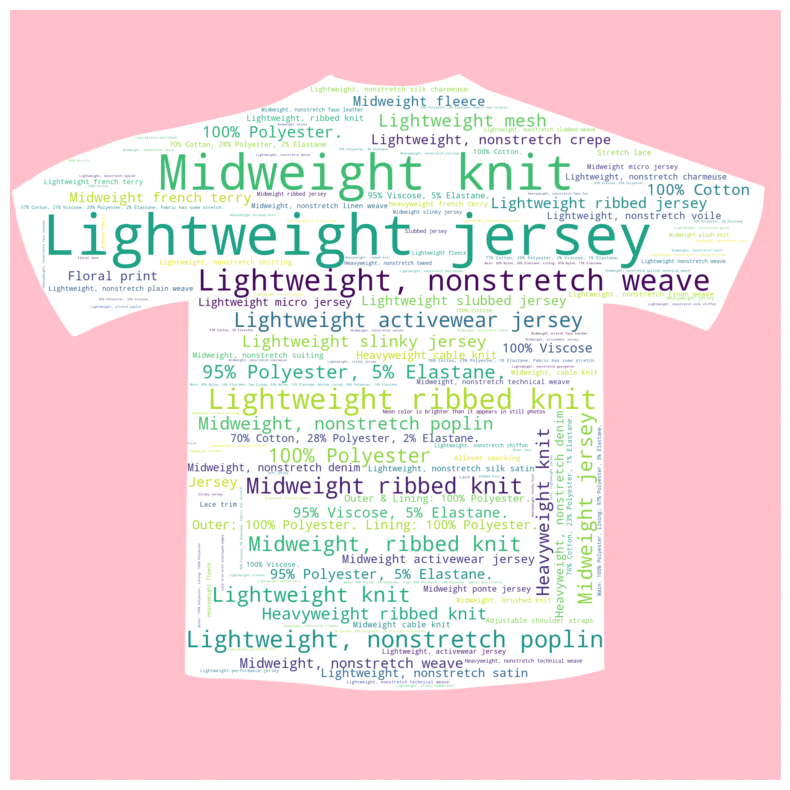

In [59]:
def transform_format(val):
    if val == 0:
        return 255
    else:
        return val

    
image_file=Image.open("shirt_final_mask.png")
image_file=image_file.convert('1')
shirt_mask = np.array(image_file)

transformed_shirt_mask = np.ndarray((shirt_mask.shape[0],shirt_mask.shape[1]), np.int32)

for i in range(len(shirt_mask)):
    transformed_shirt_mask[i] = list(map(transform_format, shirt_mask[i]))

wc = WordCloud(background_color="white", max_words=150, mask=transformed_shirt_mask,contour_width=3, contour_color='pink')

wc=wc.generate_from_frequencies(data)
plt.figure(figsize=[20,10])
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

links to websites we used:

    1.https://towardsdatascience.com/a-complete-guide-to-plotting-categorical-variables-with-seaborn-bfe54db66bec
    
    2.the curse notebook 
    
    3.https://matplotlib.org/stable/tutorials/colors/colormaps.html
    
    